In [1]:
import pandas as pd
from sklearn import preprocessing
from info_gain import info_gain
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import mutual_info_score
from sklearn.feature_selection import SelectKBest

In [24]:
df=pd.read_csv("Iris.csv")
label=preprocessing.LabelEncoder()
df['Class Label']=label.fit_transform(df['Class Label'])

In [25]:
df.shape

(150, 6)

In [26]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class Label
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [5]:
X=df.drop('Class Label',axis=1)
Y=df['Class Label']

In [6]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [7]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class Label, Length: 150, dtype: int32

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.8,random_state=20)

In [9]:
Object=KNeighborsClassifier(n_neighbors=3)

In [10]:
Object.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
result=Object.predict(X_test)

In [12]:
print(accuracy_score(y_test,result))

0.95


In [13]:
a=[]
for i in range(5):
    ml_att_class=mutual_info_score(df.iloc[:,i],df['Class Label'])
    a.append(ml_att_class)
a

C:\Users\dalve\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\dalve\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\dalve\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\dalve\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarni

[1.09861228866811,
 0.6078468394475832,
 0.35410807526503824,
 1.002510220562348,
 0.9952885384500019]

In [14]:
x = df.drop(['Id'], axis=1)
y = df['Class Label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.8,random_state=20)
Object=KNeighborsClassifier(n_neighbors=3)
Object.fit(X_train,y_train)
result=Object.predict(X_test)
print(accuracy_score(y_test,result))

0.95


In [15]:
cor=X_train.corr
print(cor)

<bound method DataFrame.corr of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
120  121            6.9           3.2            5.7           2.3
17    18            5.1           3.5            1.4           0.3
77    78            6.7           3.0            5.0           1.7
3      4            4.6           3.1            1.5           0.2
18    19            5.7           3.8            1.7           0.3
146  147            6.3           2.5            5.0           1.9
136  137            6.3           3.4            5.6           2.4
107  108            7.3           2.9            6.3           1.8
10    11            5.4           3.7            1.5           0.2
32    33            5.2           4.1            1.5           0.1
110  111            6.5           3.2            5.1           2.0
83    84            6.0           2.7            5.1           1.6
61    62            5.9           3.0            4.2           1.5
131  132            7.9       

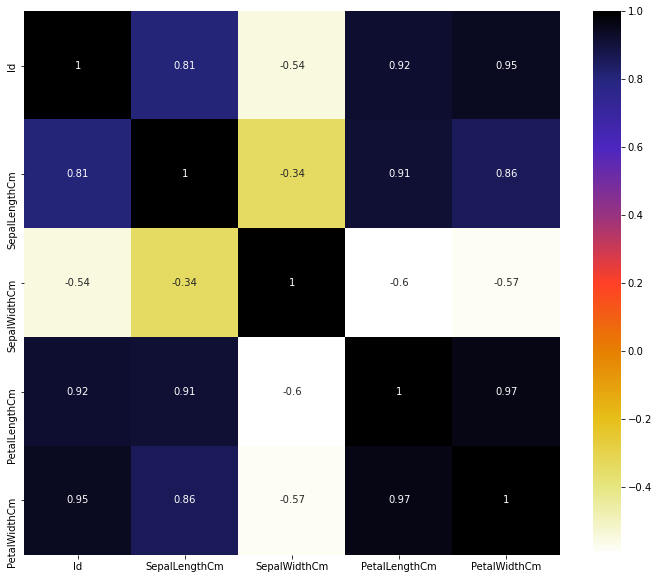

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [17]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

3

In [19]:
corr_features

{'PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm'}

In [20]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Id,SepalWidthCm
47,48,3.2
73,74,2.8
74,75,2.9
129,130,3.0
67,68,2.7
...,...,...
90,91,2.6
79,80,2.6
124,125,3.3
140,141,3.1


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.8,random_state=20)
Object=KNeighborsClassifier(n_neighbors=3)
Object.fit(X_train,y_train)
result=Object.predict(X_test)
print(accuracy_score(y_test,result))

0.95


In [23]:
for i in range(5):
    print(info_gain.info_gain_ratio(df.iloc[:,i],df['Class Label']))

0.693147180559945
0.38350865662185274
0.22341732066463374
0.6325135264122691
0.6279571522967555


In [ ]:
https://github.com/krishnaik06/Complete-Feature-Selection

In [27]:
x = df.drop(['SepalWidthCm'], axis=1)
y = df['Class Label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.8,random_state=20)
Object=KNeighborsClassifier(n_neighbors=3)
Object.fit(X_train,y_train)
result=Object.predict(X_test)
print(accuracy_score(y_test,result))

0.95
